### Xiaotong He
### DSC672

In [80]:
import pandas as pd
import glob
import json
from pandas import json_normalize
from ast import literal_eval
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('max_columns', None)
import warnings
warnings.filterwarnings('ignore') # hide warning messages

## Data Preprocessing

In [3]:
filename = 'data/train.csv'
def read_file(file):
    dtypes = {'date':'str','fullVisitorId': 'str'}
    parse_dates = ['date']
    USE_COLUMNS = [
        'channelGrouping', 'date', 'device', 'fullVisitorId', 'geoNetwork',
        'socialEngagementType', 'totals', 'trafficSource', 'visitId',
        'visitNumber', 'visitStartTime',
    ]
    JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
    
    df = pd.read_csv(file, dtype = dtypes, parse_dates = parse_dates,
                    converters={column: json.loads for column in JSON_COLUMNS},
                    usecols=USE_COLUMNS)
    
# transform time feature
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['day'] = df['date'].dt.day
    df['dayofweek'] = df['date'].dt.dayofweek
    df['hour']=pd.to_datetime(df['visitStartTime'],unit='s').dt.hour

# flatten json cols
    for column in JSON_COLUMNS:
        column_as_df = json_normalize(df[column])
        column_as_df.columns = [f"{column}_{subcolumn}" for subcolumn in column_as_df.columns]
        df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)

# drop cols   
    drop_cols = [
    'visitStartTime',
#     'date',
#     'fullVisitorId',
#     'visitId',
        
    'socialEngagementType',
    
    'device_browserSize',
    'device_operatingSystemVersion',
    'device_mobileDeviceBranding',
    'device_mobileDeviceModel',
    'device_mobileInputSelector',
    'device_mobileDeviceInfo',
    'device_mobileDeviceMarketingName',
    'device_flashVersion',
    'device_language',
    'device_screenColors',
    'device_screenResolution',
    'device_browserVersion',
    
    'geoNetwork_cityId',
    'geoNetwork_latitude',
    'geoNetwork_longitude',
    'geoNetwork_networkLocation',
    
    'totals_visits',
    
    'trafficSource_adwordsClickInfo.criteriaParameters',
    'trafficSource_referralPath',       
    'trafficSource_adwordsClickInfo.page',         
    'trafficSource_adwordsClickInfo.slot',             
    'trafficSource_adwordsClickInfo.gclId',            
    'trafficSource_adwordsClickInfo.adNetworkType',
    'trafficSource_adContent',                     
    'trafficSource_campaignCode', 
        
    'geoNetwork_continent',
    'geoNetwork_region',
    'geoNetwork_metro',
    'geoNetwork_city',
    'geoNetwork_networkDomain',
    'trafficSource_keyword',   
    ]
    
    df = df.drop(drop_cols,axis=1)
    return df

In [ ]:
# --fill missing values--
def fill_missing(df):
    values = {
              'totals_transactionRevenue' : 0,
              'trafficSource_adwordsClickInfo.isVideoAd' : True,
              'trafficSource_isTrueDirect' : False,
              'trafficSource_keyword' : '(not provided)',
              'totals_pageviews' : 1, 
              'totals_bounces':0,
              'totals_newVisits':0,
              'totals_timeOnSite':0,
              'totals_transactionRevenue':0
             }
    df = df.fillna(value=values)
    
    # --convert type--
    df = df.astype({
                'totals_hits': 'int64',
                'totals_pageviews': 'int64',
                'totals_newVisits': 'int64',
                'totals_transactionRevenue': 'int64',
                'totals_bounces': 'int64',})
    return df

In [ ]:
df = read_file(filename)
clean_df = fill_missing(df)

In [ ]:
# clean_df.to_csv('data/clean_data.csv')

In [4]:
clean_df = pd.read_csv('data/clean_data.csv',index_col=0)

/Users/xiaotonghe/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
clean_df.head()

,channelGrouping,date,fullVisitorId,visitId,visitNumber,year,month,day,dayofweek,hour,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_subContinent,geoNetwork_country,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_isTrueDirect,trafficSource_adwordsClickInfo.isVideoAd
0,Organic Search,2016-09-02,1131660440785968503,1472830385,1,2016,9,2,4,15,Chrome,Windows,False,desktop,Western Asia,Turkey,1,1,1,1,0,(not set),google,organic,False,True
1,Organic Search,2016-09-02,377306020877927890,1472880147,1,2016,9,2,4,5,Firefox,Macintosh,False,desktop,Australasia,Australia,1,1,1,1,0,(not set),google,organic,False,True
2,Organic Search,2016-09-02,3895546263509774583,1472865386,1,2016,9,2,4,1,Chrome,Windows,False,desktop,Southern Europe,Spain,1,1,1,1,0,(not set),google,organic,False,True
3,Organic Search,2016-09-02,4763447161404445595,1472881213,1,2016,9,2,4,5,UC Browser,Linux,False,desktop,Southeast Asia,Indonesia,1,1,1,1,0,(not set),google,organic,False,True
4,Organic Search,2016-09-02,27294437909732085,1472822600,2,2016,9,2,4,13,Chrome,Android,True,mobile,Northern Europe,United Kingdom,1,1,1,0,0,(not set),google,organic,True,True


### feature engineering <br>
categorical var binning <br>

In [6]:
# device_browser
keep_lst = ['Chrome','Safari','Firefox','Internet Explorer','Edge',                                            
'Android Webview','Safari (in-app)','Opera Mini','Opera','UC Browser','YaBrowser']
clean_df['device_browser'] = clean_df['device_browser'].apply(lambda x: 'Others' if x not in keep_lst else x)

In [7]:
# device_operatingSystem
keep_lst = ['Windows','Macintosh','Android','iOS','Linux','Chrome','OS','(not set)']
clean_df['device_operatingSystem'] = clean_df['device_operatingSystem'].apply(lambda x: 'Others' if x not in keep_lst else x)

In [8]:
# trafficSource_source
keep_lst = ['google','youtube.com','(direct)','mall.googleplex.com','Partners']
clean_df['trafficSource_source'] = clean_df['trafficSource_source'].apply(lambda x: 'Others' if x not in keep_lst else x)

'totals_transactionRevenue' / 100000<br>
because Total transaction revenue, expressed as the value passed to Analytics multiplied by 10^6 (e.g., 2.40 would be given as 2400000).

In [9]:
clean_df['totals_transactionRevenue'] = clean_df['totals_transactionRevenue'].apply(lambda x: x/1000000) 

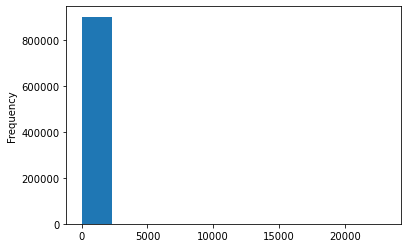

In [10]:
clean_df['totals_transactionRevenue'].plot(kind='hist')

standardization for 'totals_transactionRevenue'

In [11]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(clean_df['totals_transactionRevenue'].values.reshape(-1,1))
clean_df['totals_transactionRevenue_nor'] = scaler.transform(clean_df['totals_transactionRevenue'].values.reshape(-1,1))

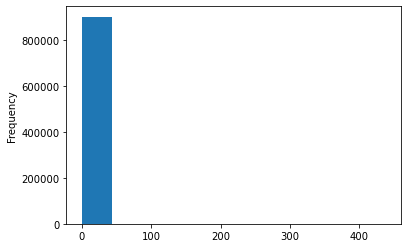

In [12]:
clean_df['totals_transactionRevenue_nor'].plot(kind='hist')

## Model Building

In [13]:
tr_df = clean_df.copy()

In [14]:
drop_cols = ['fullVisitorId','visitId']
tr_df = tr_df.drop(drop_cols,axis=1)

variables encoding

In [15]:
cat_cols = [
    'channelGrouping', 'device_browser','device_operatingSystem','device_isMobile',
    'device_deviceCategory','geoNetwork_subContinent','geoNetwork_country','trafficSource_campaign',
    'trafficSource_source','trafficSource_medium','trafficSource_isTrueDirect',
    'trafficSource_adwordsClickInfo.isVideoAd' 
]

num_cols = [
    'visitNumber','year','month','day','dayofweek','hour','totals_hits','totals_pageviews',
    'totals_bounces','totals_newVisits'
]

target_var = ['totals_transactionRevenue_nor']


In [16]:
for col in cat_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(tr_df[col].values.astype('str')))
    tr_df[col] = lbl.transform(list(tr_df[col].values.astype('str')))

channelGrouping
device_browser
device_operatingSystem
device_isMobile
device_deviceCategory
geoNetwork_subContinent
geoNetwork_country
trafficSource_campaign
trafficSource_source
trafficSource_medium
trafficSource_isTrueDirect
trafficSource_adwordsClickInfo.isVideoAd


In [17]:
tr_df.groupby(['year','month']).count()

channelGrouping    date  visitNumber     day  dayofweek    hour  \
year month                                                                    
2016 8                74759   74759        74759   74759      74759   74759   
     9                71032   71032        71032   71032      71032   71032   
     10               97506   97506        97506   97506      97506   97506   
     11              113972  113972       113972  113972     113972  113972   
     12               79124   79124        79124   79124      79124   79124   
2017 1                64694   64694        64694   64694      64694   64694   
     2                62192   62192        62192   62192      62192   62192   
     3                69931   69931        69931   69931      69931   69931   
     4                67126   67126        67126   67126      67126   67126   
     5                65371   65371        65371   65371      65371   65371   
     6                63578   63578        63578   63578      63578   63578   
     7                71812   71812        71812   71812      71812   71812   
     8                 2556    2556         2556    2556       2556    2556   

            device_browser  device_operatingSystem  device_isMobile  \
year month                                                            
2016 8               74759                   74759            74759   
     9               71032                   71032            71032   
     10              97506                   97506            97506   
     11             113972                  113972           113972   
     12              79124                   79124            79124   
2017 1               64694                   64694            64694   
     2               62192                   62192            62192   
     3               69931                   69931            69931   
     4               67126                   67126            67126   
     5               65371                   65371            65371   
     6               63578                   63578            63578   
     7               71812                   71812            71812   
     8                2556                    2556             2556   

            device_deviceCategory  geoNetwork_subContinent  \
year month                                                   
2016 8                      74759                    74759   
     9                      71032                    71032   
     10                     97506                    97506   
     11                    113972                   113972   
     12                     79124                    79124   
2017 1                      64694                    64694   
     2                      62192                    62192   
     3                      69931                    69931   
     4                      67126                    67126   
     5                      65371                    65371   
     6                      63578                    63578   
     7                      71812                    71812   
     8                       2556                     2556   

            geoNetwork_country  totals_hits  totals_pageviews  totals_bounces  \
year month                                                                      
2016 8                   74759        74759             74759           74759   
     9                   71032        71032             71032           71032   
     10                  97506        97506             97506           97506   
     11                 113972       113972            113972          113972   
     12                  79124        79124             79124           79124   
2017 1                   64694        64694             64694           64694   
     2                   62192        62192             62192           62192   
     3                   69931        69931             69931           69931   
     4             

feature selection

In [18]:
def features_filter(df,cols):
    new_df = df.filter(cols, axis=1)
    return new_df

Estimate mutual information for a continuous target variable.

In [19]:
features = cat_cols + num_cols

In [20]:
X_df = features_filter(tr_df,features)
y_df = features_filter(tr_df,target_var)

In [28]:
from sklearn import feature_selection
F_value,p_value=feature_selection.f_regression(X_df,y_df.values.ravel())

In [41]:
len(features)

22

In [40]:
d = {'feature':features,'F':F_value}
pd.DataFrame(data=d).sort_values(['F'],ascending=False)

,feature,F
19,totals_pageviews,22418.536796
18,totals_hits,22048.815577
12,visitNumber,2390.593888
21,totals_newVisits,1533.788651
20,totals_bounces,938.238545
10,trafficSource_isTrueDirect,859.103545
6,geoNetwork_country,453.442121
3,device_isMobile,247.715195
4,device_deviceCategory,219.388193
1,device_browser,208.520281


train and test set

In [42]:
# spliit train and test dataset based on time
import datetime
tr_df['date'] = pd.to_datetime(tr_df['date'])
train_df = tr_df[tr_df['date']<='2017-05-31']
valid_df = tr_df[tr_df['date']>'2017-05-31']

In [43]:
train_df = train_df.drop(['date'],axis=1)
valid_df = valid_df.drop(['date'],axis=1)

In [44]:
train_df.head()

,channelGrouping,visitNumber,year,month,day,dayofweek,hour,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,geoNetwork_subContinent,geoNetwork_country,totals_hits,totals_pageviews,totals_bounces,totals_newVisits,totals_transactionRevenue,trafficSource_campaign,trafficSource_source,trafficSource_medium,trafficSource_isTrueDirect,trafficSource_adwordsClickInfo.isVideoAd,totals_transactionRevenue_nor
0,4,1,2016,9,2,4,15,1,5,0,0,21,204,1,1,1,1,0.0,0,3,5,0,1,-0.032291
1,4,1,2016,9,2,4,5,3,3,0,0,1,12,1,1,1,1,0.0,0,3,5,0,1,-0.032291
2,4,1,2016,9,2,4,1,1,5,0,0,19,181,1,1,1,1,0.0,0,3,5,0,1,-0.032291
3,4,1,2016,9,2,4,5,10,2,0,0,16,94,1,1,1,1,0.0,0,3,5,0,1,-0.032291
4,4,2,2016,9,2,4,13,1,1,1,1,13,211,1,1,1,0,0.0,0,3,5,1,1,-0.032291


separate dependent and independent variables

In [54]:
df1 = train_df.copy()
df2 = valid_df.copy()
drop_cols = ['totals_transactionRevenue_nor','totals_transactionRevenue']
X_train = df1.drop(drop_cols,axis=1)
X_valid = df2.drop(drop_cols,axis=1)
y_train = train_df['totals_transactionRevenue_nor']
y_valid = valid_df['totals_transactionRevenue_nor']

select features by F_value (drop features with low F_value)

In [55]:
drop_cols = ['channelGrouping','device_operatingSystem','trafficSource_campaign','year',
            'trafficSource_adwordsClickInfo.isVideoAd','day']
X_train = X_train.drop(drop_cols,axis=1)
X_valid = X_valid.drop(drop_cols,axis=1)

## Model Building

baseline model<br>
### 1) gradient boosting

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
reg = GradientBoostingRegressor(random_state=0, n_estimators = 50,learning_rate = 0.1,max_depth = 5)
reg.fit(X_train, y_train)

preds = reg.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.925292


### 2) xgboost

In [71]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
params = {
    'objective':'reg:squarederror',
    'colsample_bytree':0.3,
    'learning_rate':0.01,
    'max_depth':5,
    'alpha':10,
    'n_estimators':10,
}
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 50)

xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_valid)

rmse = np.sqrt(mean_squared_error(y_valid, preds))
print("RMSE: %f" % (rmse))


RMSE: 0.929103


feature importance

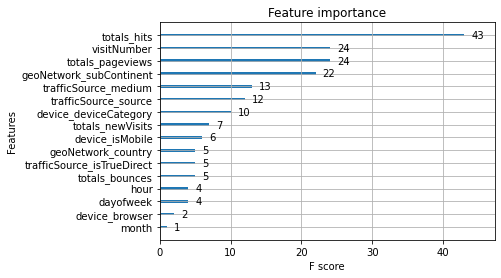

In [62]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### 3) light gbm

In [75]:
# custom function to run light gbm model
import lightgbm as lgb

params = {
    'boosting_type': 'gbdt', 
    "objective" : "regression",
    "metric" : "rmse", 
    'max_depth': 6,
    "num_leaves" : 30,

    "learning_rate" : 0.1,
    "bagging_fraction" : 0.7,
    "feature_fraction" : 0.5,

    "min_child_samples" : 100,
    "reg_alpha" : 0.001,
    "reg_lambda" : 8,

    "bagging_frequency" : 5,
    "bagging_seed" : 2018,
    "verbosity" : 1,
    "num_iterations" : 200,
}
    
lgtrain = lgb.Dataset(X_train, label=y_train)
lgval = lgb.Dataset(X_valid, label=y_valid)
model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=1000, verbose_eval=100)
pred_val_y = model.predict(X_valid, num_iteration=model.best_iteration)

/Users/xiaotonghe/opt/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Training until validation scores don't improve for 1000 rounds
[100]	valid_0's rmse: 0.925106
[200]	valid_0's rmse: 0.926825
Did not meet early stopping. Best iteration is:
[35]	valid_0's rmse: 0.923704


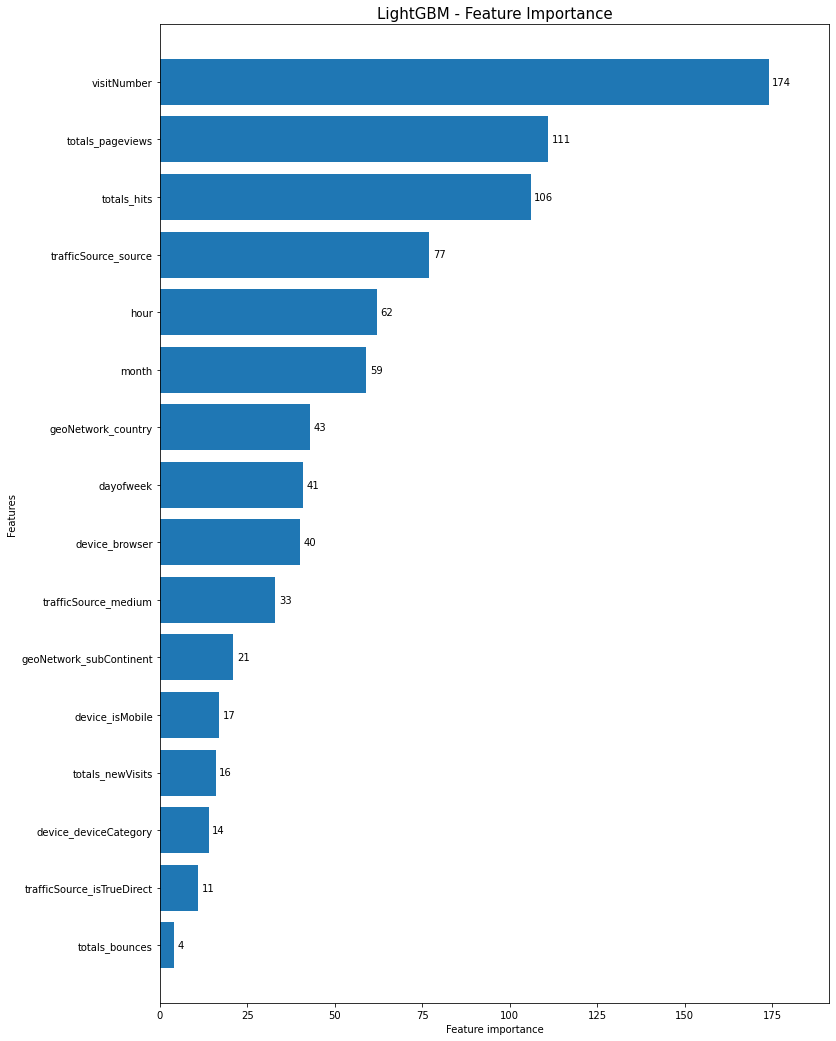

In [76]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

## Hypertuning

### light gbm
https://lightgbm.readthedocs.io/en/latest/Parameters.html

1) max_depth , num_leaves <br>
    purpose: these two params is to decide the size and complexity of the tree

In [87]:
parameters = {
    'max_depth': [4,6,8],
    'num_leaves': [20,30,40],
}

model = lgb.LGBMRegressor(
    boosting_type  = 'gbdt', 
    objective  = "regression",
    metric = "rmse", 
    learning_rate = 0.1,
    bagging_fraction = 0.7,
    feature_fraction = 0.5,
    min_child_samples = 100,
    reg_alpha = 0.001,
    reg_lambda = 8,
    bagging_freq = 5,
    bagging_seed = 2018,
    verbosity = 1,
    num_iterations = 200,
)
gsearch = GridSearchCV(model, param_grid=parameters, scoring='neg_root_mean_squared_error', cv=3)
gsearch.fit(X_train,y_train)

print('Best parameter:{0}'.format(gsearch.best_params_))
print('Best score:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])


Best parameter:{'max_depth': 4, 'num_leaves': 20}
Best score:-0.9223180538918189
[-0.92231805 -0.92231805 -0.92231805 -0.9240623  -0.92404874 -0.9250471
 -0.92450206 -0.92513947 -0.92482352]
[{'max_depth': 4, 'num_leaves': 20}, {'max_depth': 4, 'num_leaves': 30}, {'max_depth': 4, 'num_leaves': 40}, {'max_depth': 6, 'num_leaves': 20}, {'max_depth': 6, 'num_leaves': 30}, {'max_depth': 6, 'num_leaves': 40}, {'max_depth': 8, 'num_leaves': 20}, {'max_depth': 8, 'num_leaves': 30}, {'max_depth': 8, 'num_leaves': 40}]


2) min_data_in_leaf , min_sum_hessian_in_leaf<br>
    purpose: avoid overfitting

In [89]:
parameters = {
    'min_child_samples': [100,200,300,400,500],
    'min_child_weight': [0.001,0.002]
                    }

model = lgb.LGBMRegressor(
    boosting_type  = 'gbdt', 
    objective  = "regression",
    metric = "rmse", 
    learning_rate = 0.1,
    bagging_fraction = 0.7,
    feature_fraction = 0.5,
    reg_alpha = 0.001,
    reg_lambda = 8,
    bagging_freq = 5,
    bagging_seed = 2018,
    verbosity = 1,
    num_iterations = 200,
    max_depth = 4,
    num_leaves = 20,
)
gsearch = GridSearchCV(model, param_grid=parameters, scoring='neg_root_mean_squared_error', cv=3)
gsearch.fit(X_train,y_train)

print('Best parameter:{0}'.format(gsearch.best_params_))
print('Best score:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

Best parameter:{'min_child_samples': 400, 'min_child_weight': 0.001}
Best score:-0.9181057007234136
[-0.92231805 -0.92231805 -0.91901734 -0.91901734 -0.91847908 -0.91847908
 -0.9181057  -0.9181057  -0.91861696 -0.91861696]
[{'min_child_samples': 100, 'min_child_weight': 0.001}, {'min_child_samples': 100, 'min_child_weight': 0.002}, {'min_child_samples': 200, 'min_child_weight': 0.001}, {'min_child_samples': 200, 'min_child_weight': 0.002}, {'min_child_samples': 300, 'min_child_weight': 0.001}, {'min_child_samples': 300, 'min_child_weight': 0.002}, {'min_child_samples': 400, 'min_child_weight': 0.001}, {'min_child_samples': 400, 'min_child_weight': 0.002}, {'min_child_samples': 500, 'min_child_weight': 0.001}, {'min_child_samples': 500, 'min_child_weight': 0.002}]


3) feature_fraction<br>
    purpose: select part of data without resampling, speed up training, deal with overfitting

In [90]:
parameters = {
    'feature_fraction': [0.6, 0.8, 1],
}

model = lgb.LGBMRegressor(
    boosting_type  = 'gbdt', 
    objective  = "regression",
    metric = "rmse", 
    learning_rate = 0.1,
    bagging_fraction = 0.7,
    reg_alpha = 0.001,
    reg_lambda = 8,
    bagging_freq = 5,
    bagging_seed = 2018,
    verbosity = 1,
    num_iterations = 200,
    max_depth = 4,
    num_leaves = 20,
    min_child_samples=400,
    min_child_weight=0.001,
)
gsearch = GridSearchCV(model, param_grid=parameters, scoring='neg_root_mean_squared_error', cv=3)
gsearch.fit(X_train,y_train)

print('Best parameter:{0}'.format(gsearch.best_params_))
print('Best score:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

Best parameter:{'feature_fraction': 1}
Best score:-0.9172518537823565
[-0.91835847 -0.91754378 -0.91725185]
[{'feature_fraction': 0.6}, {'feature_fraction': 0.8}, {'feature_fraction': 1}]


4) bagging_fraction , bagging_freq(need to setup together)<br> 
bagging_fraction is like subsampling, make bagging faster, and deal with overfitting;<br>
bagging_freq is the freq of bagging;

In [92]:
parameters = {
     'bagging_fraction': [0.2,0.5,0.8,1],
     'bagging_freq': [0,2,4,8],
}

model = lgb.LGBMRegressor(
    boosting_type  = 'gbdt', 
    objective  = "regression",
    metric = "rmse", 
    learning_rate = 0.1,
    reg_alpha = 0.001,
    reg_lambda = 8,
    bagging_seed = 2018,
    verbosity = 1,
    num_iterations = 200,
    max_depth = 4,
    num_leaves = 20,
    min_child_samples=400,
    min_child_weight=0.001,
    feature_fraction=1,
)
gsearch = GridSearchCV(model, param_grid=parameters, scoring='neg_root_mean_squared_error', cv=3)
gsearch.fit(X_train,y_train)

print('Best parameter:{0}'.format(gsearch.best_params_))
print('Best score:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

Best parameter:{'bagging_fraction': 0.8, 'bagging_freq': 8}
Best score:-0.9174150381148126
[-0.91921412 -0.91995929 -0.92020456 -0.9208791  -0.91921412 -0.91803505
 -0.91838778 -0.91921358 -0.91921412 -0.9185284  -0.91807336 -0.91741504
 -0.91921412 -0.91921412 -0.91921412 -0.91921412]
[{'bagging_fraction': 0.2, 'bagging_freq': 0}, {'bagging_fraction': 0.2, 'bagging_freq': 2}, {'bagging_fraction': 0.2, 'bagging_freq': 4}, {'bagging_fraction': 0.2, 'bagging_freq': 8}, {'bagging_fraction': 0.5, 'bagging_freq': 0}, {'bagging_fraction': 0.5, 'bagging_freq': 2}, {'bagging_fraction': 0.5, 'bagging_freq': 4}, {'bagging_fraction': 0.5, 'bagging_freq': 8}, {'bagging_fraction': 0.8, 'bagging_freq': 0}, {'bagging_fraction': 0.8, 'bagging_freq': 2}, {'bagging_fraction': 0.8, 'bagging_freq': 4}, {'bagging_fraction': 0.8, 'bagging_freq': 8}, {'bagging_fraction': 1, 'bagging_freq': 0}, {'bagging_fraction': 1, 'bagging_freq': 2}, {'bagging_fraction': 1, 'bagging_freq': 4}, {'bagging_fraction': 1, 'bag

5) lambda_l1(reg_alpha) , lambda_l2(reg_lambda)
deal with overfitting

In [93]:
parameters = {
     'reg_alpha': [0.1,0.01,0.001],
     'reg_lambda': [2,4,6,8],
}

model = lgb.LGBMRegressor(
    boosting_type  = 'gbdt', 
    objective  = "regression",
    metric = "rmse", 
    learning_rate = 0.1,
    bagging_seed = 2018,
    verbosity = 1,
    num_iterations = 200,
    max_depth = 4,
    num_leaves = 20,
    min_child_samples=400,
    min_child_weight=0.001,
    feature_fraction=1,
    bagging_fraction=0.8,
    bagging_freq = 8,
)
gsearch = GridSearchCV(model, param_grid=parameters, scoring='neg_root_mean_squared_error', cv=3)
gsearch.fit(X_train,y_train)

print('Best parameter:{0}'.format(gsearch.best_params_))
print('Best score:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

Best parameter:{'reg_alpha': 0.01, 'reg_lambda': 6}
Best score:-0.917255429019764
[-0.91777175 -0.91733087 -0.9176139  -0.91740594 -0.91730758 -0.91736548
 -0.91725543 -0.91741502 -0.91730762 -0.91736549 -0.91725543 -0.91741504]
[{'reg_alpha': 0.1, 'reg_lambda': 2}, {'reg_alpha': 0.1, 'reg_lambda': 4}, {'reg_alpha': 0.1, 'reg_lambda': 6}, {'reg_alpha': 0.1, 'reg_lambda': 8}, {'reg_alpha': 0.01, 'reg_lambda': 2}, {'reg_alpha': 0.01, 'reg_lambda': 4}, {'reg_alpha': 0.01, 'reg_lambda': 6}, {'reg_alpha': 0.01, 'reg_lambda': 8}, {'reg_alpha': 0.001, 'reg_lambda': 2}, {'reg_alpha': 0.001, 'reg_lambda': 4}, {'reg_alpha': 0.001, 'reg_lambda': 6}, {'reg_alpha': 0.001, 'reg_lambda': 8}]


6) cat_smooth <br>
tree purning 

In [94]:
parameters = {
     'cat_smooth': [0,100,200,500],
}

model = lgb.LGBMRegressor(
    boosting_type  = 'gbdt', 
    objective  = "regression",
    metric = "rmse", 
    learning_rate = 0.1,
    bagging_seed = 2018,
    verbosity = 1,
    num_iterations = 200,
    max_depth = 4,
    num_leaves = 20,
    min_child_samples=400,
    min_child_weight=0.001,
    feature_fraction=1,
    bagging_fraction=0.8,
    bagging_freq = 8,
    reg_alpha=0.01,
    reg_lambda=6,
    
)
gsearch = GridSearchCV(model, param_grid=parameters, scoring='neg_root_mean_squared_error', cv=3)
gsearch.fit(X_train,y_train)

print('Best parameter:{0}'.format(gsearch.best_params_))
print('Best score:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

Best parameter:{'cat_smooth': 0}
Best score:-0.917255429019764
[-0.91725543 -0.91725543 -0.91725543 -0.91725543]
[{'cat_smooth': 0}, {'cat_smooth': 100}, {'cat_smooth': 200}, {'cat_smooth': 500}]


7) learning_rate , num_iterations

In [95]:
parameters = {
     'learning_rate': [0.1,0.01],
    'num_iterations' : [200,500,800]
}

model = lgb.LGBMRegressor(
    boosting_type  = 'gbdt', 
    objective  = "regression",
    metric = "rmse", 
    bagging_seed = 2018,
    verbosity = 1,
    
    max_depth = 4,
    num_leaves = 20,
    min_child_samples=400,
    min_child_weight=0.001,
    feature_fraction=1,
    bagging_fraction=0.8,
    bagging_freq = 8,
    reg_alpha=0.01,
    reg_lambda=6,
    cat_smooth=0
    
)
gsearch = GridSearchCV(model, param_grid=parameters, scoring='neg_root_mean_squared_error', cv=3)
gsearch.fit(X_train,y_train)

print('Best parameter:{0}'.format(gsearch.best_params_))
print('Best score:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

Best parameter:{'learning_rate': 0.01, 'num_iterations': 800}
Best score:-0.9170483210452445
[-0.91725543 -0.92313831 -0.93136292 -0.91927677 -0.91780569 -0.91704832]
[{'learning_rate': 0.1, 'num_iterations': 200}, {'learning_rate': 0.1, 'num_iterations': 500}, {'learning_rate': 0.1, 'num_iterations': 800}, {'learning_rate': 0.01, 'num_iterations': 200}, {'learning_rate': 0.01, 'num_iterations': 500}, {'learning_rate': 0.01, 'num_iterations': 800}]


## Model Evaluation

final light gbm

In [107]:
# custom function to run light gbm model
import lightgbm as lgb

model = lgb.LGBMRegressor(
    boosting_type  = 'gbdt', 
    objective  = "regression",
    metric = "rmse", 
    bagging_seed = 2018,
    verbosity = 1,
    max_depth = 4,
    num_leaves = 20,
    min_child_samples=400,
    min_child_weight=0.001,
    feature_fraction=1,
    bagging_fraction=0.8,
    bagging_freq = 8,
    reg_alpha=0.01,
    reg_lambda=6,
    cat_smooth=0, 
    learning_rate=0.01,
    num_iterations=800)
model.fit(X_train,y_train)
prediction = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.925292


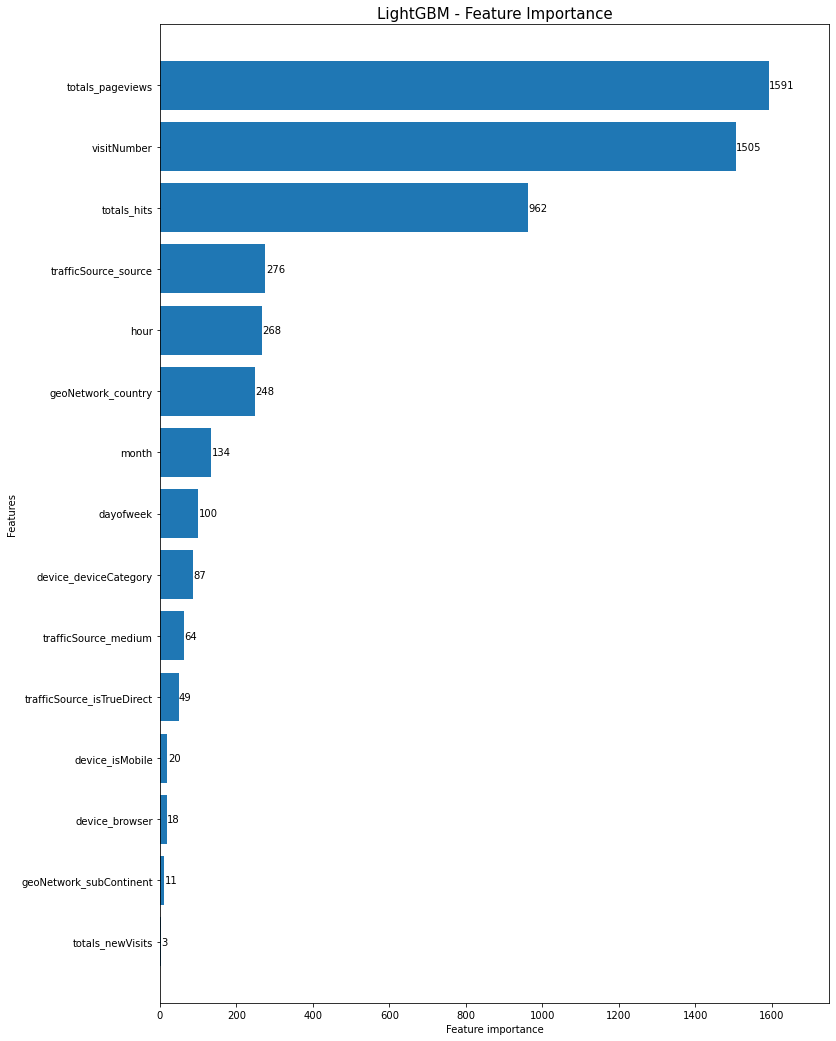

In [108]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()